In [1]:
import numpy as np
import matplotlib.pylab as plt
from sparsity_estimators import Adaptive_Lasso_SS, ir_cond,ir_condAL,ir_condrAL
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample, shuffle

import seaborn as sns

from matplotlib import rc, font_manager
from sklearn.linear_model import Ridge
%load_ext autoreload
%autoreload 2

In [2]:
sns.set(font_scale=1.5)
sns.set_style("white")


# Noiseless dataset

In [3]:
u     = np.load('deep_learning_based/data/KS_u.npy')
x     = np.load('deep_learning_based/data/KS_x.npy')
t     = np.load('deep_learning_based/data/KS_t.npy')

theta = np.load('../data/KS_theta.npy')
dt    = np.load('../data/KS_dt.npy')


theta = np.array(theta,dtype=np.float64)
dt = np.array(dt,dtype=np.float64)


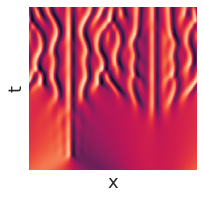

In [4]:

plt.figure(figsize=(3,3))
ax = sns.heatmap(u.reshape(len(x),len(t)).T,cbar=False)


ax.invert_yaxis()
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel('x')
ax.set_ylabel('t');


In [5]:
theta.shape[0]

257024

In [6]:
theta, dt = shuffle(theta, dt, random_state=0)

In [7]:
GT = [7,12,24]
not_GT = np.setdiff1d(np.arange(0,theta.shape[1]),np.array(GT)).tolist()

In [8]:
theta.shape

(257024, 36)

In [9]:
width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 18,
    "font.size": 14,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
}

plt.rcParams.update(tex_fonts)

# Adaptive weights impact

In [10]:
nI = 20
l_samples = 5*np.logspace(1, 4, 100, base=10)

m_ircs = []
m_ircsAL = []
m_ircsrAL = []


np.random.seed(seed=42)        
d1=1
d2=2
    
    
for i,n_samples in enumerate(l_samples):

    l_irc = []
    l_ircAL = []
    l_ircrAL = []

    for seed in range(nI):
        idx = sample_without_replacement(n_population=theta.shape[0]-1, n_samples=n_samples, random_state=seed)
        X = theta[idx]
        y = dt[idx]

        # lasso
        irc = ir_cond(X,GT);
        l_irc.append(irc[1].max())        

        # adaptive lasso
        ircAL = ir_condAL(X,y,GT);
        l_ircAL.append(ircAL[1].max())        
    

    m_irc_mean    = np.array(l_irc).mean()
    m_irc_std    = np.array(l_irc).std()
    m_ircs.append([m_irc_mean,m_irc_std])

    m_ircAL_mean    = np.array(l_ircAL).mean()
    m_ircAL_std    = np.array(l_ircAL).std()
    m_ircsAL.append([m_ircAL_mean,m_ircAL_std])
    
    
m_ircs = np.array(m_ircs)
m_ircsAL = np.array(m_ircsAL)


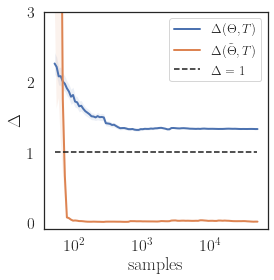

In [11]:
plt.figure(figsize=(4,4))

plt.plot(l_samples,m_ircs[:,0],linewidth=2)
plt.fill_between(l_samples,m_ircs[:,0]-0.2*m_ircs[:,1],m_ircs[:,0]+0.2*m_ircs[:,1],alpha=0.1)

plt.plot(l_samples,m_ircsAL[:,0],linewidth=2)
plt.fill_between(l_samples,m_ircsAL[:,0]-0.2*m_ircsAL[:,1],m_ircsAL[:,0]+0.2*m_ircsAL[:,1],alpha=0.1)

plt.plot([50,5e4],[1,1],'--k')

plt.xscale('log')
#plt.yscale('log')

plt.xlabel('samples')
plt.ylabel(r'$\Delta$')

plt.ylim([-0.1,3])

plt.legend([r'$\Delta(\Theta,T)$',
            r'$\Delta(\tilde{\Theta},T)$',
           r'$\Delta=1$'],
           prop={'size': 13})

plt.savefig("figures/adaptive_weights_effect.pdf", bbox_inches='tight')

In [12]:
m_ircs[-1]

array([1.32775326, 0.01059962])

In [13]:
m_ircsAL[-1]

array([0.00758201, 0.00721969])